In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('cities_r2.csv')

In [3]:
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [44]:
df.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [7]:
df['state_name'].value_counts()

UTTAR PRADESH                63
WEST BENGAL                  61
MAHARASHTRA                  43
ANDHRA PRADESH               42
MADHYA PRADESH               32
TAMIL NADU                   32
GUJARAT                      29
RAJASTHAN                    29
BIHAR                        26
KARNATAKA                    26
HARYANA                      20
PUNJAB                       16
NCT OF DELHI                 15
ORISSA                       10
JHARKHAND                    10
CHHATTISGARH                  9
KERALA                        7
UTTARAKHAND                   6
ASSAM                         4
JAMMU & KASHMIR               3
PUDUCHERRY                    2
MANIPUR                       1
MEGHALAYA                     1
ANDAMAN & NICOBAR ISLANDS     1
CHANDIGARH                    1
NAGALAND                      1
TRIPURA                       1
MIZORAM                       1
HIMACHAL PRADESH              1
Name: state_name, dtype: int64

In [36]:
x=df[['sex_ratio','effective_literacy_rate_total']]
x

,sex_ratio,effective_literacy_rate_total
0,890,79.86
1,928,91.99
2,982,80.51
3,902,83.46
4,1013,68.38
...,...,...
488,1039,81.85
489,998,84.16
490,982,94.05
491,877,85.91


In [37]:
import matplotlib.pylab as plt

In [38]:
# finding ideal number of clusters

# 1.Elbow method

from sklearn.cluster import KMeans,AgglomerativeClustering
sse=[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [39]:
sse

[1553437.6204896548,
 529161.5115888764,
 317766.71200056747,
 220265.65238500515,
 153766.82426282892,
 113679.20700292864,
 83293.74861138643,
 69735.16342718028,
 57845.10768241627,
 48741.12532232671,
 43115.34881916574,
 38905.86397874042,
 36260.09756058178,
 33151.355418290215,
 30692.5499422854]

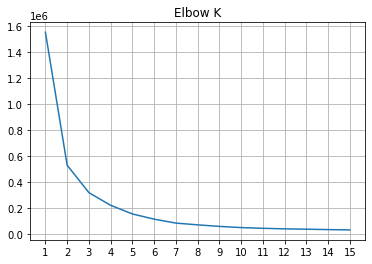

In [40]:
plt.title('Elbow K')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse)
# k=2

In [41]:
# using shil

from sklearn.metrics import silhouette_score

silh=[]

for k in range(2,16):
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    silh.append(score)

<BarContainer object of 14 artists>

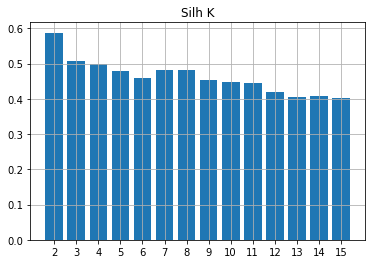

In [42]:
plt.title('Silh K')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),silh)
# k=2 -> maximum value

In [34]:
# k-Mean
km=KMeans(n_clusters=2)
labels = km.fit_predict(x)


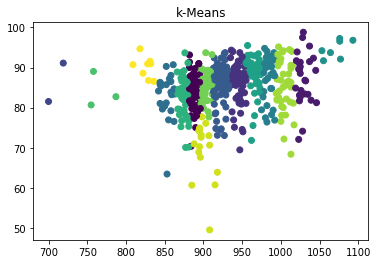

In [43]:
plt.title('k-Means')
plt.scatter(x['sex_ratio'],x['effective_literacy_rate_total'],c=labels)